# Using the Physics 50 Fitter on your own function

*Note: the Python file `fitter.py` must reside in the same folder as the Jupyter notebook file, so the `import` statement below can find the code for the `Fit` class.*

Depending on whether you are running JupyterLab or Jupyter Notebook, you may need to modify the `%matplotlib widget` line below by substituting either `inline` or `notebook` for `widget`. Your also need a recent version of `numpy`, `scipy`, and `matplotlib` installed in your Python distribution. If they are not, you can use
```
pip3 install numpy scipy matplotlib
```
at a command prompt to install them.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fit

## Defining your fitting function

The arguments to your function should be `x`, which will be given a numpy array of values of the independent variable ($x$), followed by the fitting parameters. In the example function shown here, I define a function that attempts to fit a cosine function to the data. It assumes that the `x` values represent an angle in degrees. In case the origin of angles is offset from 0, it also includes a phase parameter `phi0` ($\phi_0$).

In [6]:
def mycosine(x, A, phi0):
    "Fit a cosine y = A * cos(x + phi0), with angles in degrees"
    return A * np.cos(np.radians(x + phi0))

### Adding LaTeX variable names and function text

While this function will do the job, it will look nicer if we supply LaTeX versions of the parameter names and the function text, as illustrated below. For the variables, set a list of variables names separated by semicolons. The `r` in front of the string stands for “raw”; it means that you can use a backslash without having to “escape” it.

In [7]:
mycosine.tex = r"A;\phi_0"
mycosine.function_tex = r"A \cos(\theta + \phi_0)"

## Running the fit

To test this function, I'm going to manufacture some data with noise.

In [8]:
from numpy.random import default_rng
rng = default_rng()                               # initialize the random number generator
N = 20
I0 = 75                                           # peak current, in mA
phi0 = -37                                        # just cuz!
theta = np.linspace(0, 60, N)                     # the "x" values
noise_amp = rng.uniform(0.05, 0.5, size=N)        # pick random amplitudes for the noise at each point
noise = rng.normal(size=N) * noise_amp            # noise is randomly selected from a normal distribution
Isc = I0 * np.cos(np.radians(theta + phi0)) + noise # the actual fake data
print(Isc)

[59.76039408 62.35161211 65.02760429 66.14569701 68.12848257 69.59492736
 71.03743443 72.44294064 73.24572079 74.15443863 75.11703265 75.0348738
 74.99608378 74.77911348 74.30761695 73.68146178 73.05178627 71.77425568
 71.08785798 68.48363763]


Now we'll perform the fit, which requires passing in all the data, the fit function, some information about the function and parameters, and initial guesses for the fit parameters in a parameter called `p0`. It is very import to choose sensible guesses for these parameters and to list them in the same order as they appear in the definition of the fit function.

c:\Users\agall\Downloads\phys051techreport\Fitter\fitter.py:814: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  gs.tight_layout(fig)


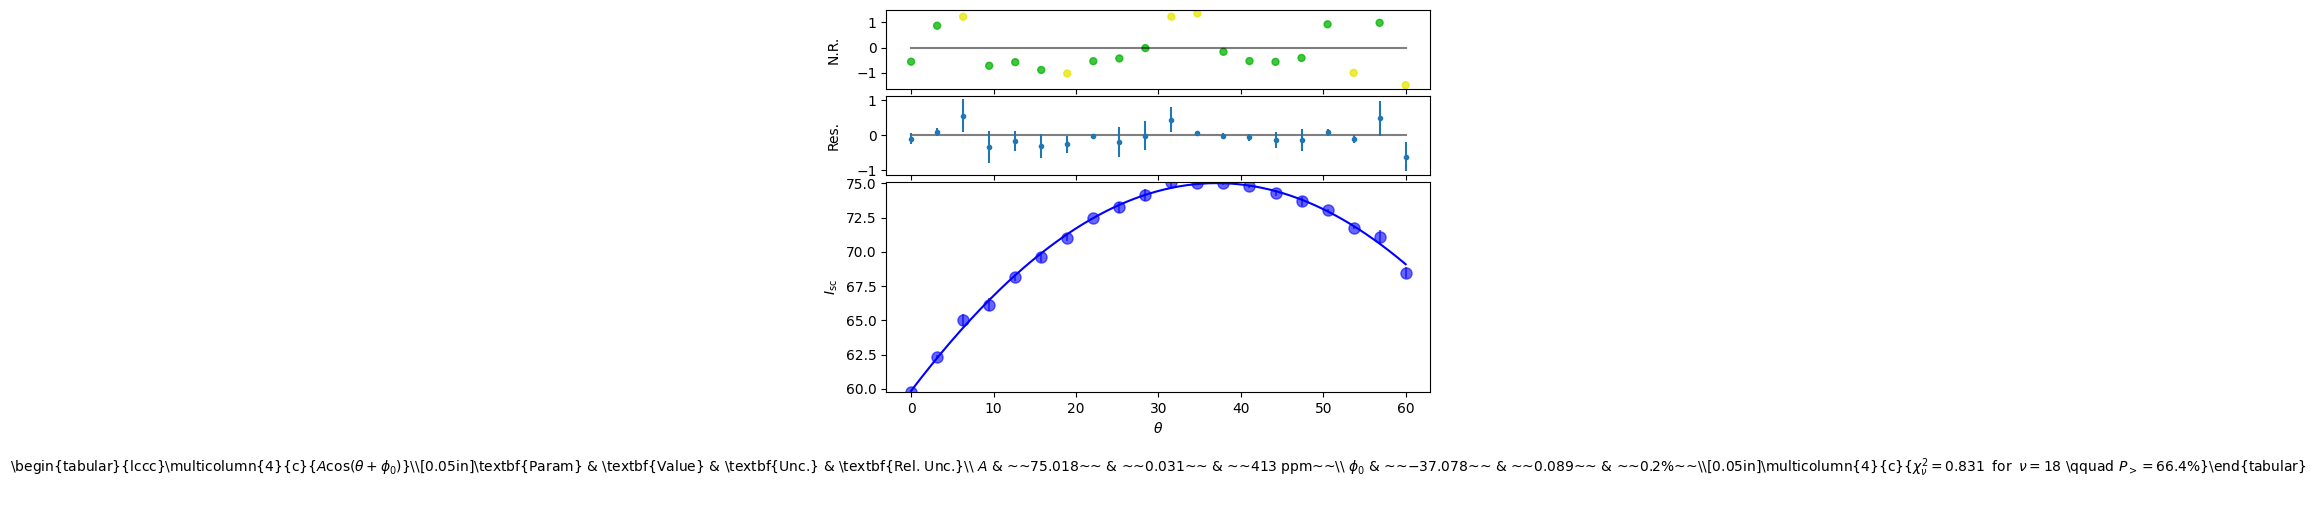

In [9]:
f = Fit(
    theta,                 # the independent variable
    Isc,                   # the dependent variable
    yunc=noise_amp,        # the uncertainties of the dependent variable
    function=mycosine,     # the fitting function
    p0=(45, -30)           # initial guesses for (A, phi0),
    )
f.plot(xlabel=r"$\theta$", ylabel=r"$I_{\rm sc}$")

If you need to make adjustments to the figure, such as modifying the axes limits, you can address the `axes` holding the data using `f.axdata`, as illustrated in the following:

In [9]:
f.axdata.set_ylim(58, 77);

## Saving the figure

To save your finished figure, use `f.fig.savefig("name.png", dpi=600)`, if you are using a word processor or `f.fig.savefig("name.pdf")` if you are using LaTeX. It will create the file in the same directory that holds `fitter.py`.

## Masking out some data

You may find that one or two data points seem to be outliers: the fit would be successful if those points were not included. Rather than simply deleting the points, it is better to keep them on the plot but not use them in the fit. You can arrange for this behavior by supplying a mask array to the Fit constructor. To illustrate, I'll first mess up a couple of points in the data of the fit we have already done.

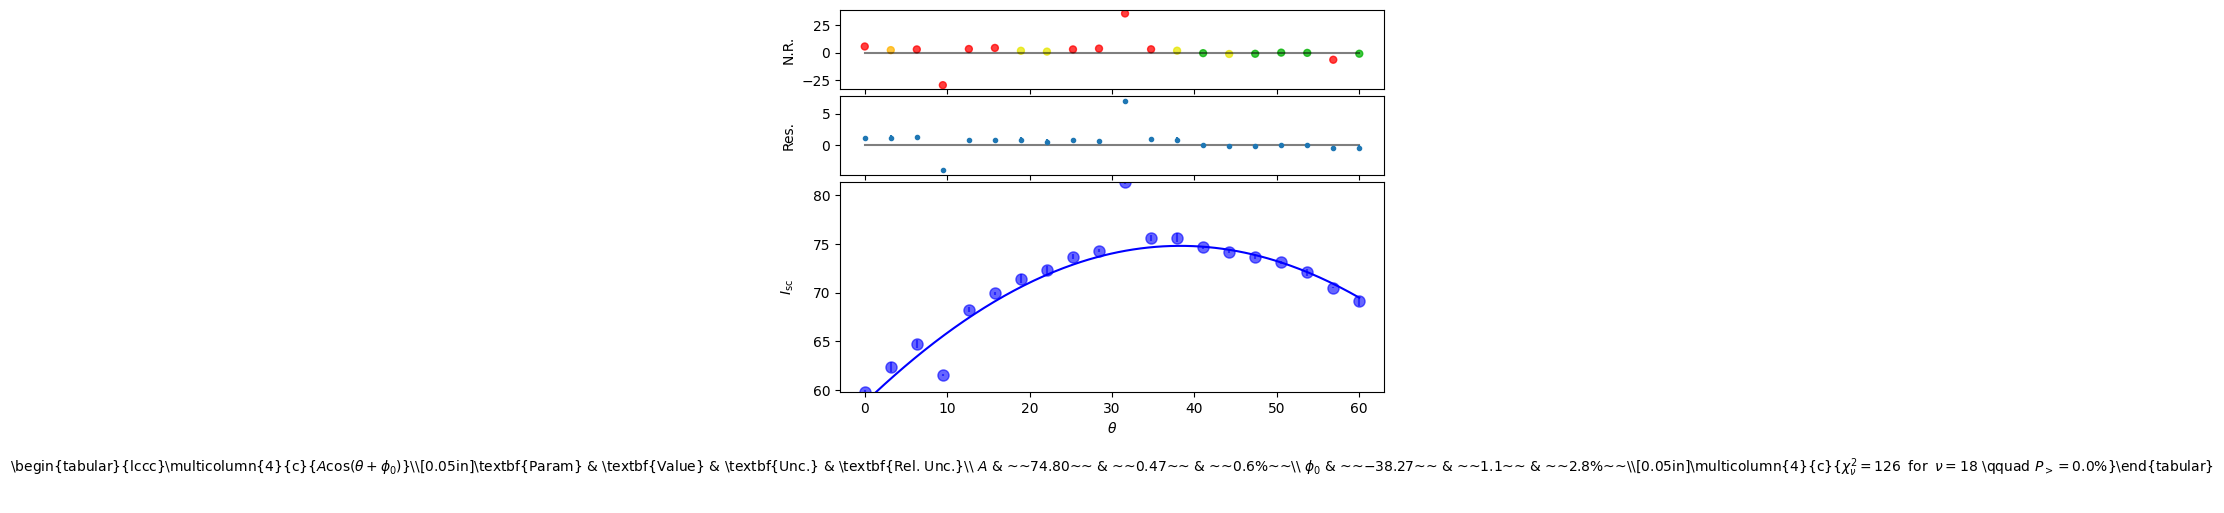

In [10]:
Isc[3] -= 5
Isc[10] += 7

fbad = Fit(
    theta,                 # the independent variable
    Isc,                   # the dependent variable
    yunc=noise_amp,        # the uncertainties of the dependent variable
    function=mycosine,     # the fitting function
    p0=(45, -30)           # initial guesses for (A, phi0),
    )
fbad.plot(xlabel=r"$\theta$", ylabel=r"$I_{\rm sc}$")

In [11]:
mask = np.arange(len(Isc)) != 3    # Create an array of booleans
mask[10] = False                   # and set points 3 and 10 to False, so they won't be used

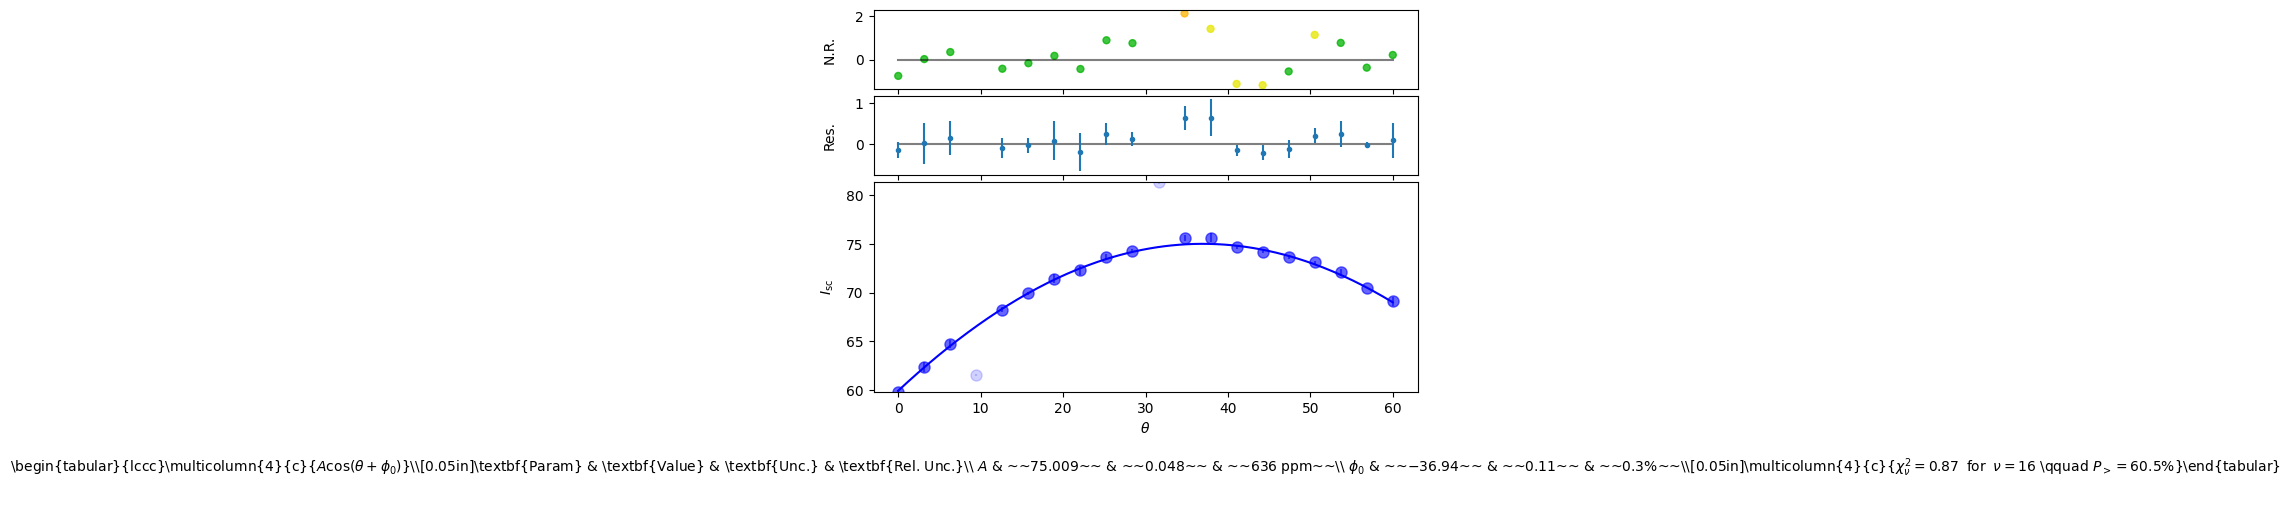

In [12]:
ffixed = Fit(
    theta,                 # the independent variable
    Isc,                   # the dependent variable
    yunc=noise_amp,        # the uncertainties of the dependent variable
    function=mycosine,     # the fitting function
    p0=(45, -30),          # initial guesses for (A, phi0),
    mask=mask              # pass in False values to mask out specific points
    )
ffixed.plot(xlabel=r"$\theta$", ylabel=r"$I_{\rm sc}$")